# Many algorithms of Clustering
 - K-means Clustering
 - Gaussian Mixture: 각 클러스터가 정규분포를 따르도록 클러스터링
 - Hierarchical Clustering
 - DBSCAN
 - HDBSCAN

In [1]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=1) 

In [ ]:
####################################################
# Kmeans Clustering
####################################################

In [3]:
# kmeans
from sklearn.cluster import KMeans
f = KMeans(n_clusters=3)
f.fit(X)
print(f.labels_)
print(f.cluster_centers_)

# inertia: 
print(f.inertia_)
pd.crosstab(f.labels_,Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
78.851441426146


col_0,0,1,2
row_0,,,
0,50,0,0
1,0,2,36
2,0,48,14


In [5]:
# determine the number of clusters
inertia_list = []
for k in range(2,30):
    f = KMeans(n_clusters=k)
    f.fit(X)
    inertia_list.append(f.inertia_)

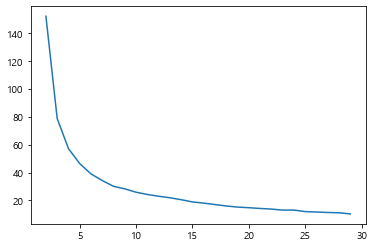

In [6]:
plt.plot(np.arange(2,30),inertia_list)

In [12]:
f = KMeans(n_clusters=5)
f.fit(X)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,0,24
2,0,0,12
3,0,26,13
4,0,24,1


In [13]:
# after scaling & PCA
from sklearn.preprocessing import StandardScaler
f = StandardScaler()
f.fit(X)
X_s = f.transform(X)

In [14]:
X_s

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [23]:
f = KMeans(n_clusters=3)
f.fit(X_s)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,0,39,14
1,50,0,0
2,0,11,36


In [17]:
from sklearn.decomposition import PCA
f = PCA()
f.fit(X_s)
X_st = f.transform(X_s)


In [24]:
# using the first component
from sklearn.decomposition import PCA
f = PCA(n_components=1)
f.fit(X_s)
X_st = f.transform(X_s)

In [25]:
f = KMeans(n_clusters=3)
f.fit(X_st)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,0,45,6
1,50,0,0
2,0,5,44


In [ ]:
####################################################
# Kmeans Clustering with Train/Test
####################################################

In [26]:
# kmeans
from sklearn.cluster import KMeans
f = KMeans(n_clusters=3)
f.fit(xtrain)
f.labels_
pd.crosstab(f.labels_,ytrain)

col_0,0,1,2
row_0,,,
0,0,2,25
1,33,0,0
2,0,29,11


In [27]:
yhat_test = f.predict(xtest)
pd.crosstab(yhat_test,ytest)

col_0,0,1,2
row_0,,,
0,0,1,11
1,17,0,0
2,0,18,3


In [ ]:
####################################################
# Gaussian Mixture
####################################################

- 각 cluster가 gaussian분포를 따르도록 클러스터링하는 기법

In [28]:
from sklearn.mixture import GaussianMixture
f = GaussianMixture(n_components=3)
f.fit(X)
f.means_
f.covariances_


array([[[0.38744093, 0.09223276, 0.30244302, 0.06087397],
        [0.09223276, 0.11040914, 0.08385112, 0.05574334],
        [0.30244302, 0.08385112, 0.32589574, 0.07276776],
        [0.06087397, 0.05574334, 0.07276776, 0.08484505]],

       [[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
        [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
        [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
        [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],

       [[0.2755171 , 0.09662295, 0.18547072, 0.05478901],
        [0.09662295, 0.09255152, 0.09103431, 0.04299899],
        [0.18547072, 0.09103431, 0.20235849, 0.06171383],
        [0.05478901, 0.04299899, 0.06171383, 0.03233775]]])

In [29]:
yhat = f.predict(X)
pd.crosstab(yhat,Y)

col_0,0,1,2
row_0,,,
0,0,5,50
1,50,0,0
2,0,45,0


In [30]:
# after scaling
from sklearn.preprocessing import StandardScaler
f = StandardScaler()
f.fit(X)
X_s = f.transform(X)

In [31]:
f = GaussianMixture(n_components=3)
f.fit(X_s)
pd.crosstab(f.predict(X_s),Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,5,50
2,0,45,0


In [32]:
# KMeans with scaling
f = KMeans(n_clusters=3)
f.fit(X)
pd.crosstab(f.labels_,Y)
f.fit(X_s)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,0,11,36
1,50,0,0
2,0,39,14


In [ ]:
####################################################
# Hierachical Clustering
####################################################

In [33]:
from sklearn.cluster import AgglomerativeClustering
f = AgglomerativeClustering(n_clusters=3)
f.fit(X)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [34]:
# different options
f = AgglomerativeClustering(n_clusters=3,affinity='cosine',linkage='complete')
f.fit(X)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,50,24
2,0,0,26


In [ ]:
####################################################
# DBSCAN
####################################################

In [35]:
from sklearn.cluster import DBSCAN
f = DBSCAN(eps=0.5,min_samples=5)
f.fit(X)
f.labels_
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
-1,1,6,10
0,49,0,0
1,0,44,40


In [36]:
# using the first two components
from sklearn.decomposition import PCA
f = PCA(n_components=2)
f.fit(X_s)
X_st = f.transform(X_s)

In [37]:
f = DBSCAN(eps=0.5,min_samples=5)
f.fit(X_st)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
-1,2,3,7
0,48,0,0
1,0,47,43


In [38]:
col_list = ['k','b','r','g','y']
col = []
for i in range(len(f.labels_)):
    col.append(col_list[f.labels_[i]+1])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

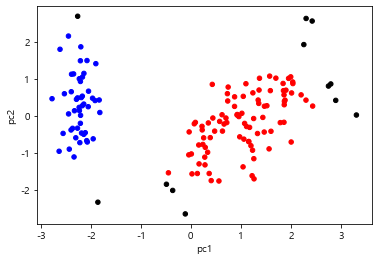

In [39]:
d = pd.DataFrame(X_st)
d.columns = ['pc1','pc2']
d.plot('pc1','pc2','scatter',c=col)

In [ ]:
####################################################
# Clustering Practices
####################################################

In [ ]:
# clustering boston data set only with X
# which method and how many cluster will you use?
# can you find the relation between the cluster and medv? 

In [ ]:
# read data
df = pd.read_csv('https://raw.githubusercontent.com/flowertoman/data/main/data01_boston.csv')
X = df.iloc[:,:-1]
Y = df['medv']